In [1]:
import pandas as pd
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score



In [2]:
df = pd.read_csv("SMSSpamCollection.tsv", sep="\t", names=["label", "text"])
df.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


/var/folders/rg/z15nbd2x3014zsym_gp48nv40000gn/T/ipykernel_6497/4191759191.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


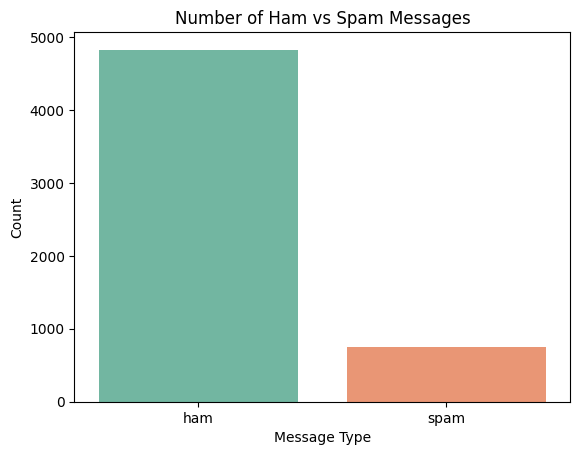

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='label', palette='Set2')
plt.title("Number of Ham vs Spam Messages")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()


In [4]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text.strip()

df['clean_text'] = df['text'].apply(clean_text)



In [5]:
le = LabelEncoder()
df['label_num'] = le.fit_transform(df['label'])  # ham=0, spam=1



In [6]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['clean_text'])
y = df['label_num']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9749


In [9]:
def predict_message(msg):
    msg_clean = clean_text(msg)
    msg_vector = tfidf.transform([msg_clean])
    result = model.predict(msg_vector)[0]
    return "Spam" if result == 1 else "Ham"

# let's test the model with some messages
print(predict_message("Congratulations! You've won a lottery of $1000"))
print(predict_message("You have won a free ticket! Text WIN to 12345"))
print(predict_message("Let's meet at the cafe around 5 pm"))


Spam
Spam
Ham


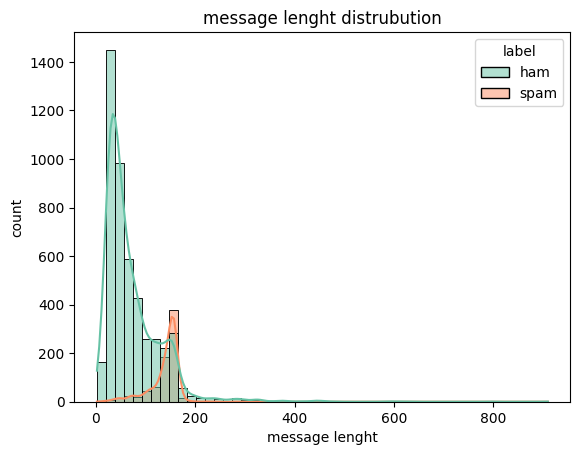

In [10]:
df['msg_length'] = df['text'].apply(len)
sns.histplot(data=df, x='msg_length', hue='label', kde=True, bins=50, palette='Set2')
plt.title("message lenght distrubution")
plt.xlabel("message lenght")
plt.ylabel("count")
plt.show()
